## Project Overview 

# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

## Dataset Description

In [58]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

crops = pd.read_csv("soil_measures.csv")

In [36]:
crops


,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice
...,...,...,...,...,...
2195,107,34,32,6.780064,coffee
2196,99,15,27,6.086922,coffee
2197,118,33,30,6.362608,coffee
2198,117,32,34,6.758793,coffee


In [37]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [38]:
crops.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [39]:
crops['crop'].value_counts()


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

## Exploratory Data Analysis (visuals & explanation)

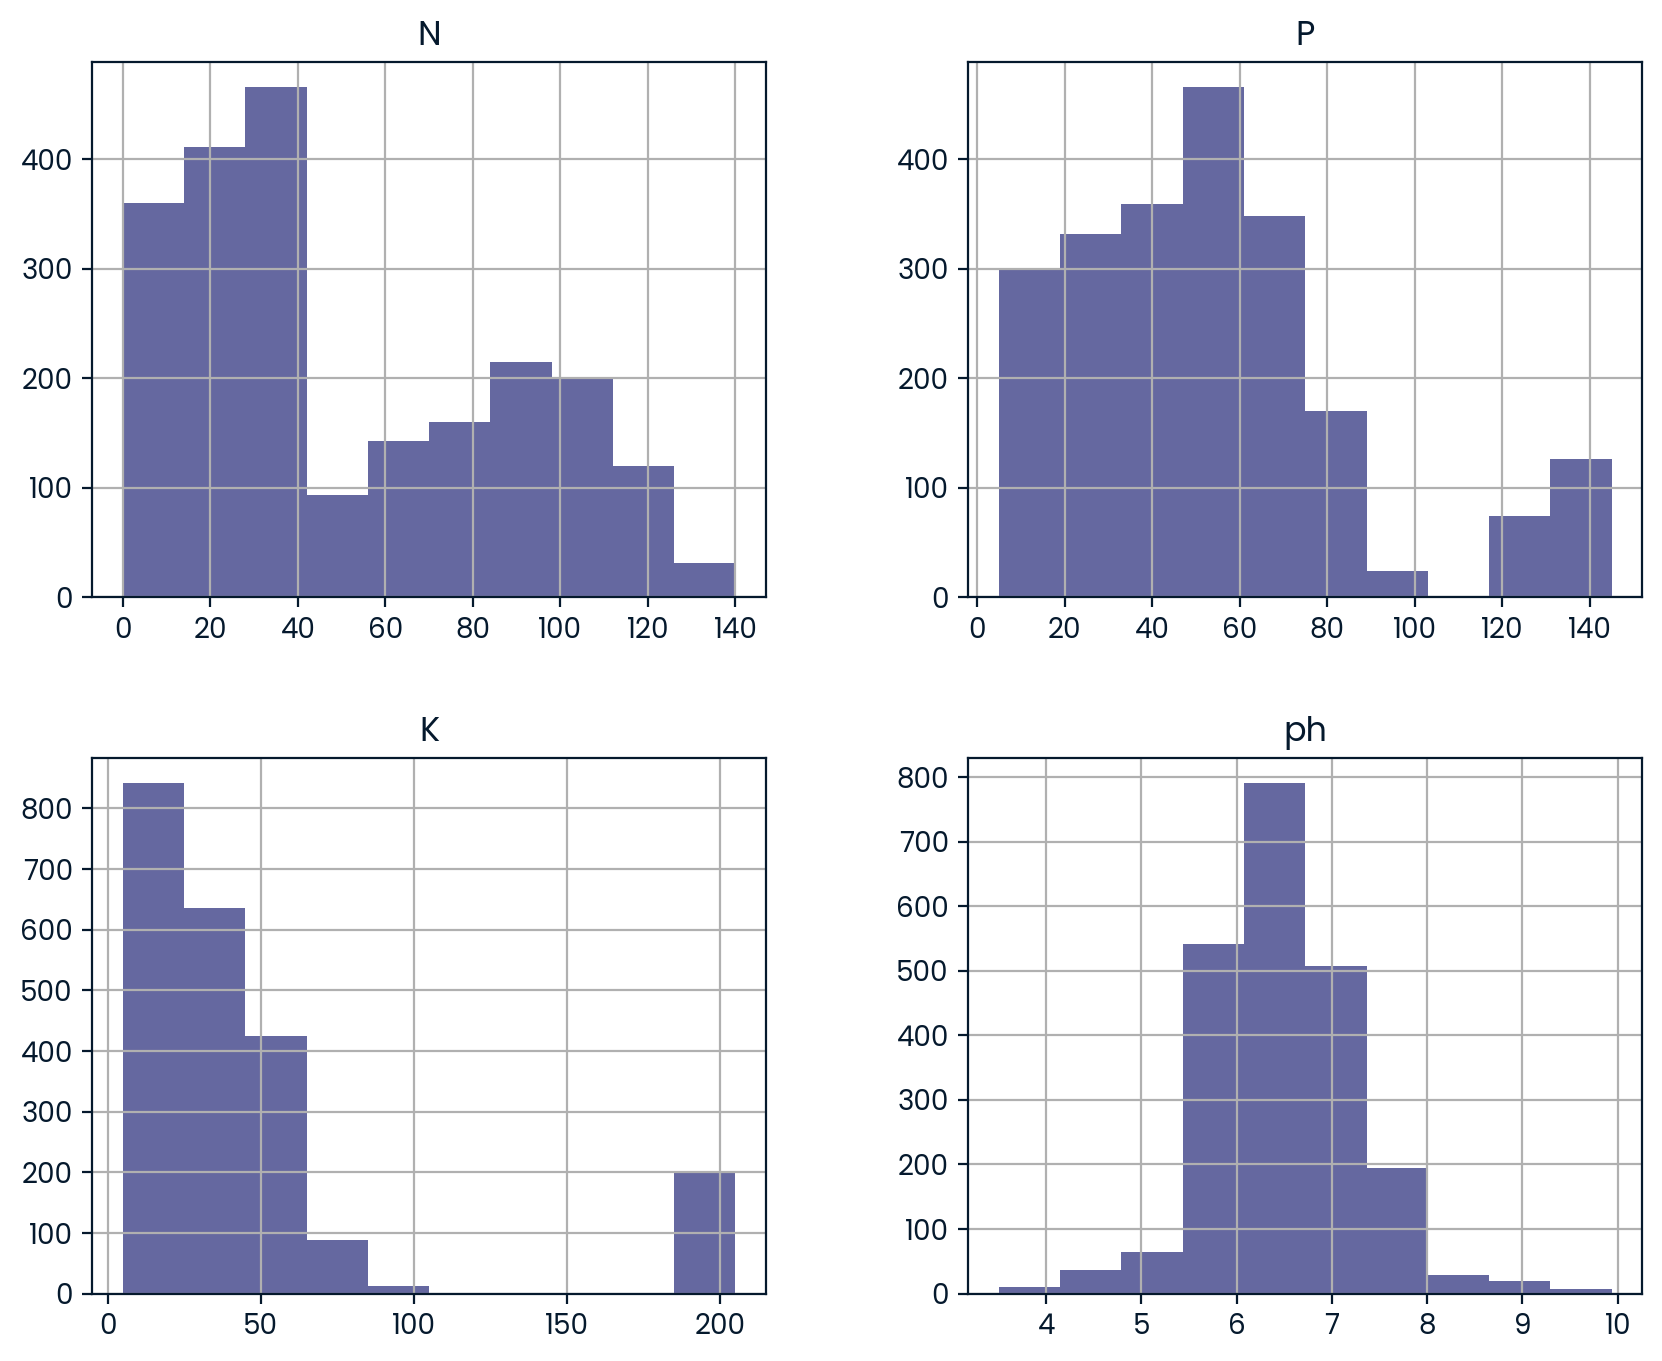

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

crops[['N','P','K','ph']].hist(figsize=(10,8))
plt.show()


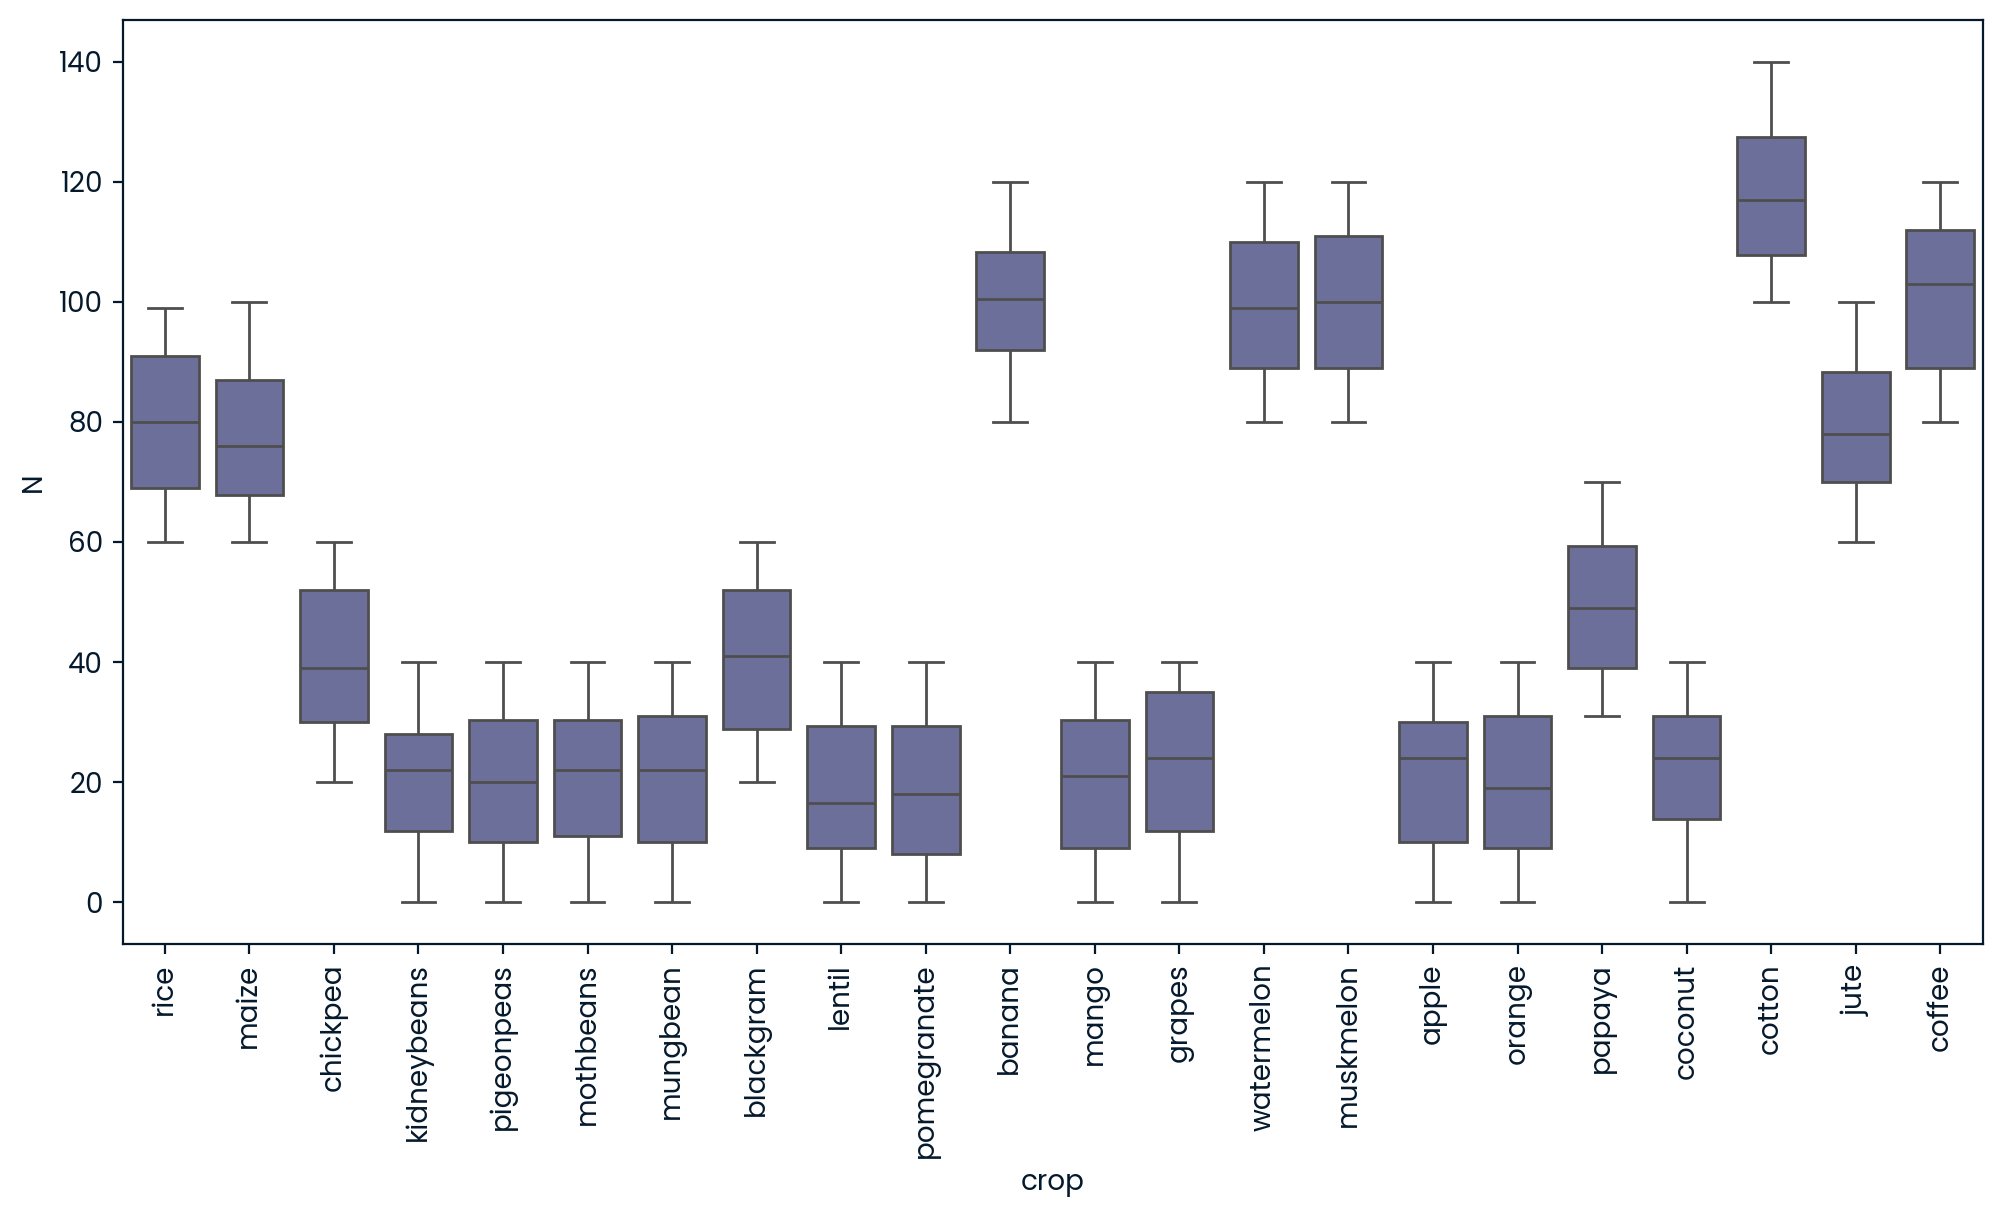

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x='crop', y='N', data=crops)
plt.xticks(rotation=90)
plt.show()


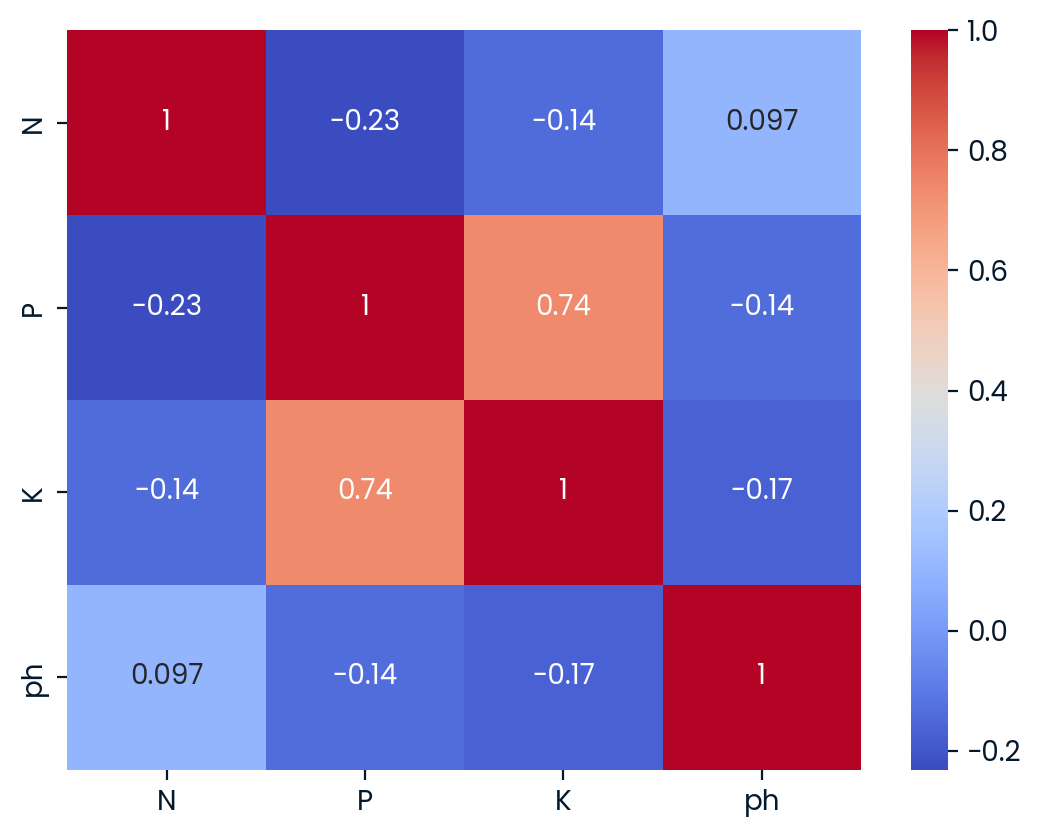

In [42]:
sns.heatmap(crops[['N','P','K','ph']].corr(), annot=True, cmap='coolwarm')
plt.show()


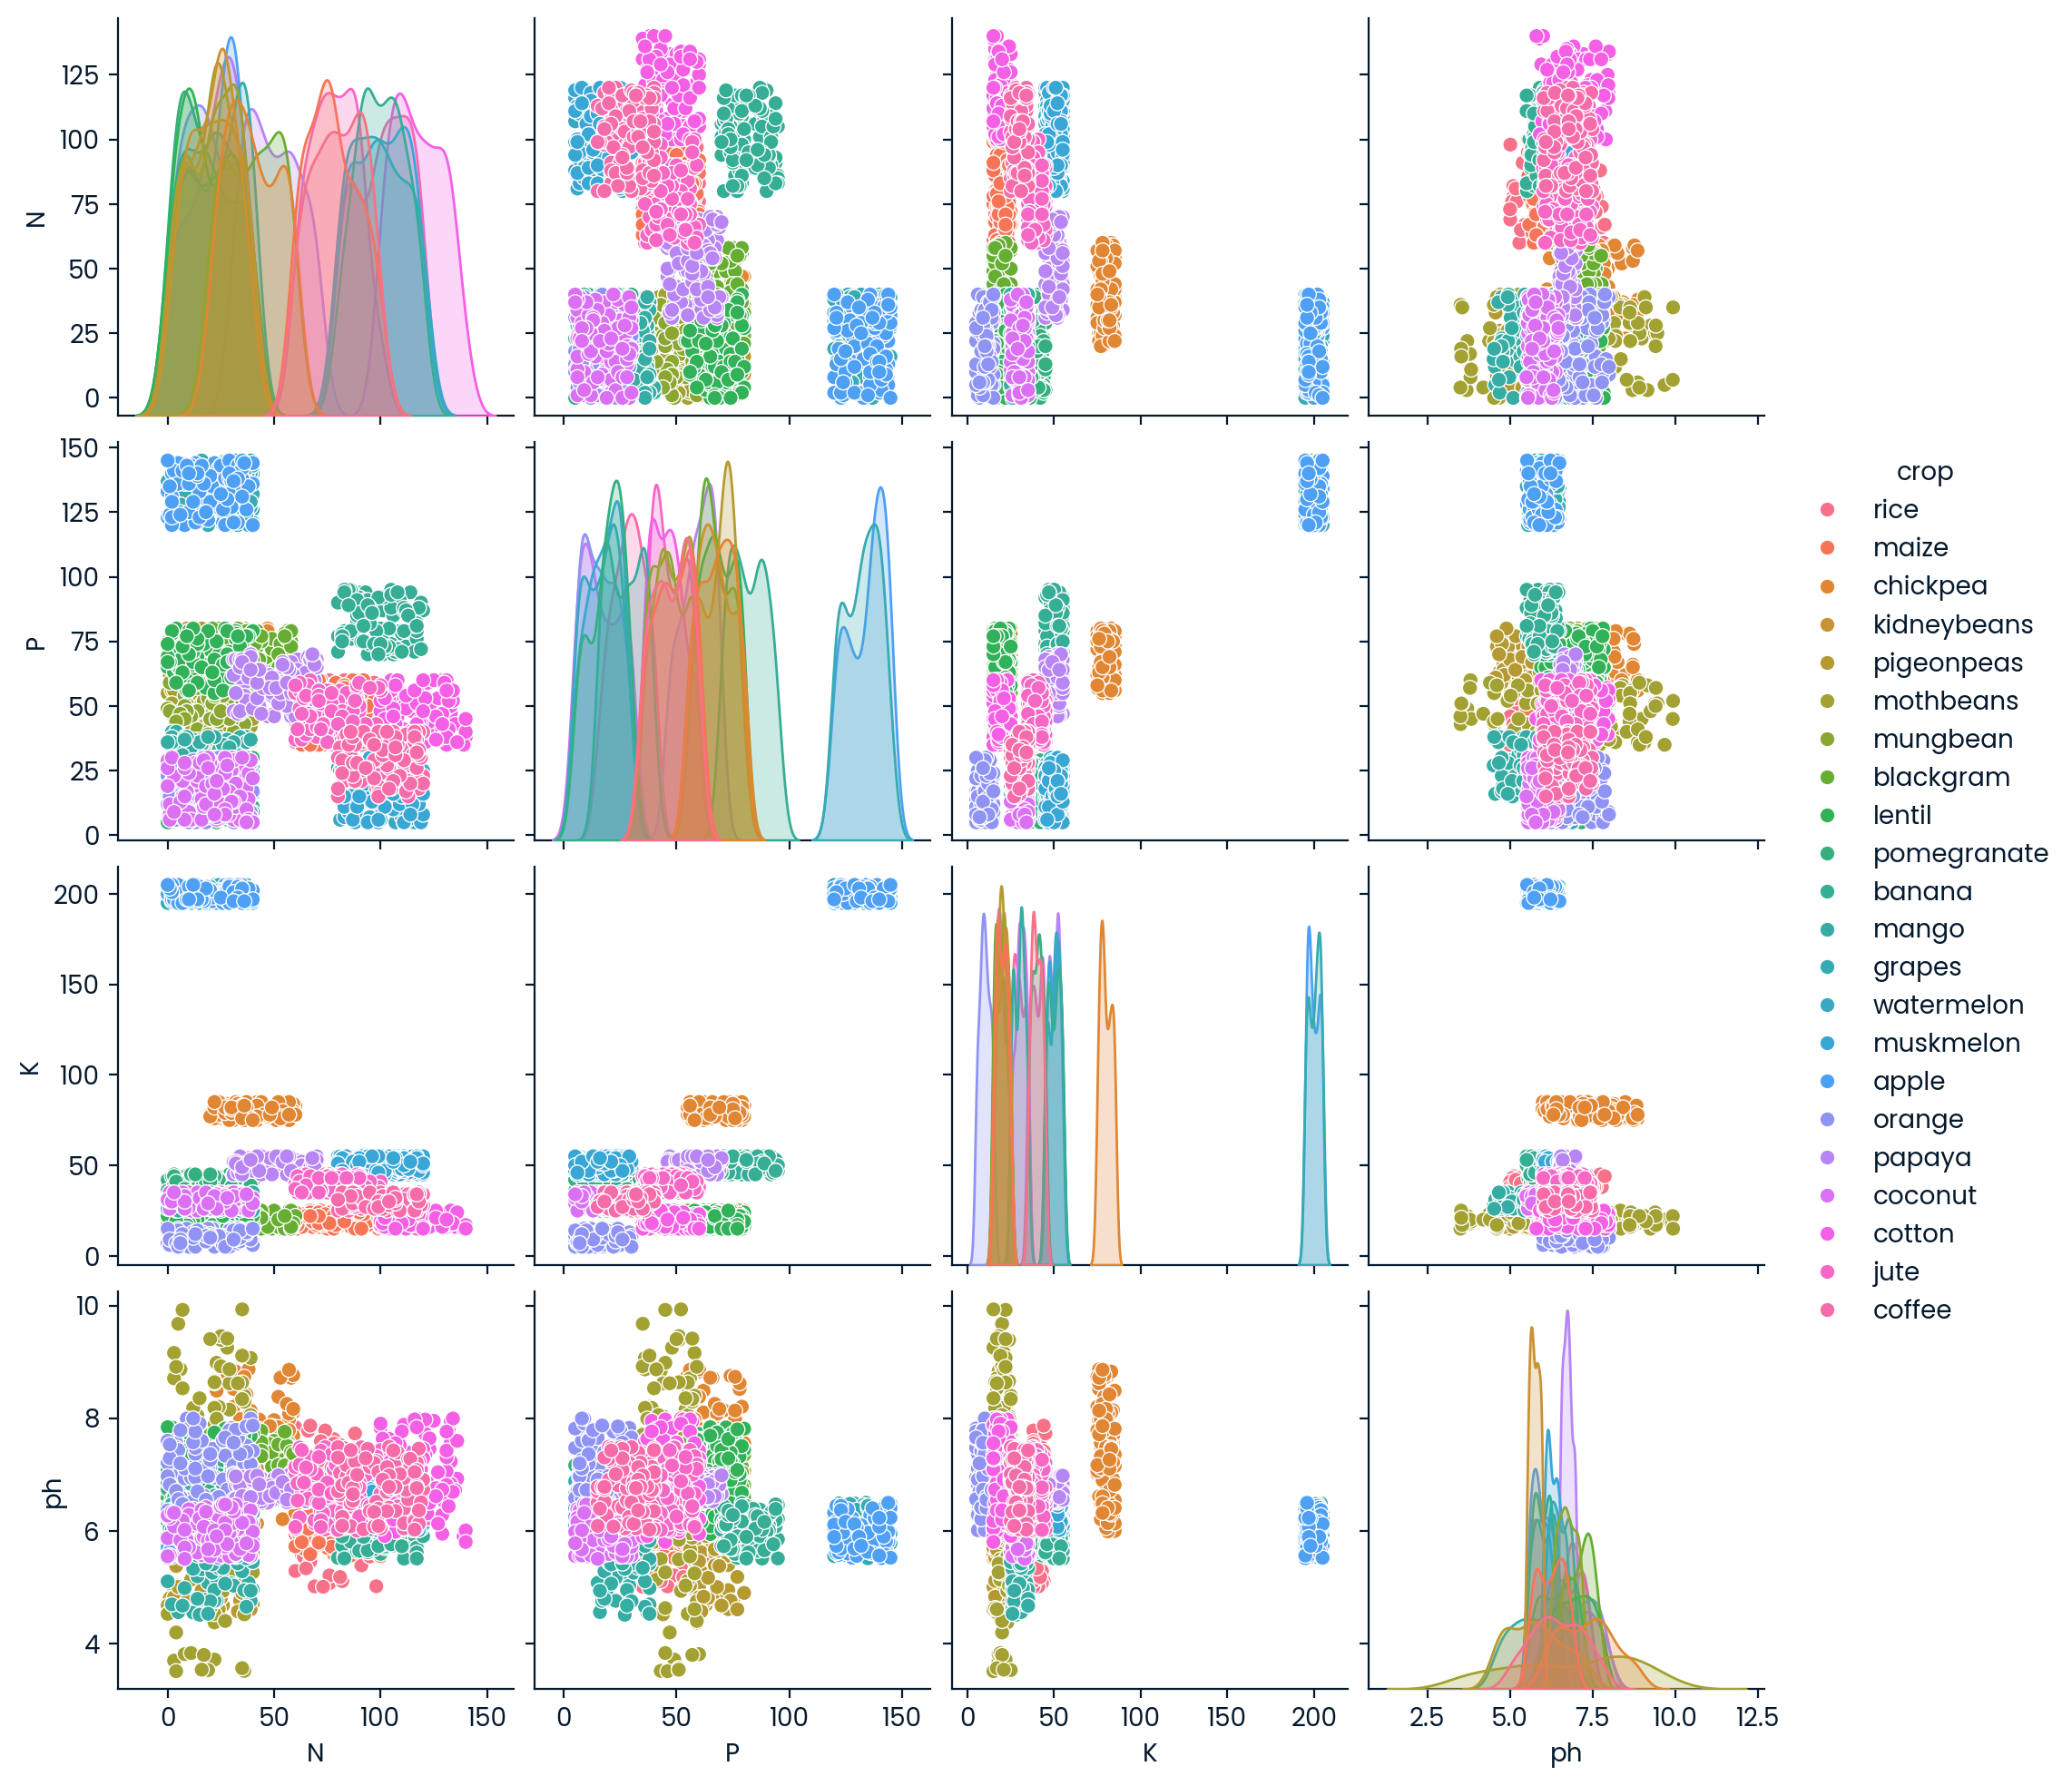

In [43]:
sns.pairplot(crops, hue='crop')


## Model Building

In [44]:
X = crops[['N','P','K','ph']]
y = crops['crop']


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000, random_state=42))
    ]),
    
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=5))
    ]),
    
    "Random Forest": RandomForestClassifier(random_state=42)
}


## Model Comparison Results

In [60]:
results = {}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = acc

results


{'Logistic Regression': 0.6840909090909091,
 'KNN': 0.7045454545454546,
 'Random Forest': 0.7454545454545455}

In [61]:
comparison_df = pd.DataFrame({
    "Model": results.keys(),
    "Accuracy": results.values()
}).sort_values(by="Accuracy", ascending=False)

comparison_df


,Model,Accuracy
2,Random Forest,0.745455
1,KNN,0.704545
0,Logistic Regression,0.684091


## Conclusions & Insights

In [62]:
feature_scores = {}

for feature in X.columns:
    
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train[[feature]], y_train)
    
    y_pred = rf.predict(X_test[[feature]])
    score = accuracy_score(y_test, y_pred)
    
    feature_scores[feature] = score

feature_scores


{'N': 0.17272727272727273,
 'P': 0.18181818181818182,
 'K': 0.29318181818181815,
 'ph': 0.11363636363636363}

In [63]:
best_feature = max(feature_scores, key=feature_scores.get)
best_score = feature_scores[best_feature]

best_predictive_feature = {best_feature: best_score}

best_predictive_feature


{'K': 0.29318181818181815}